In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,datasets,layers
import matplotlib.pyplot as plt
import matplotlib.image as mp


In [3]:
(train_images,train_labels), (test_images,test_labels)=datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print('x_train:', train_images.shape)
print('y_train:', train_labels.shape)
print('x_test:', test_images.shape)
print('y_test:', test_labels.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [5]:
pd.DataFrame(train_images[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_images=train_images/255
test_images= test_images/255

In [7]:
model=models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [8]:
h1 = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3747 - accuracy: 0.8903 - val_loss: 0.2036 - val_accuracy: 0.9394
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1803 - accuracy: 0.9479 - val_loss: 0.1568 - val_accuracy: 0.9546
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1420 - accuracy: 0.9585 - val_loss: 0.1409 - val_accuracy: 0.9603
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1202 - accuracy: 0.9638 - val_loss: 0.1278 - val_accuracy: 0.9629
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1058 - accuracy: 0.9672 - val_loss: 0.1245 - val_accuracy: 0.9644
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0942 - accuracy: 0.9716 - val_loss: 0.1233 - val_accuracy: 0.9669
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0854 - accuracy: 0.9738 - val_loss: 0.1312 - val_accuracy:

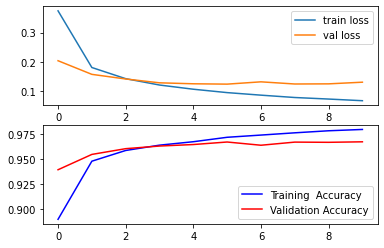

In [30]:
import matplotlib.pyplot as plt
#Plotting the training and validation loss and accuracy
f,ax=plt.subplots(2,1) 

#Loss
ax[0].plot(h1.history['loss'], label='train loss')
ax[0].plot(h1.history['val_loss'], label='val loss')
ax[0].legend(loc='upper right')
#Accuracy
ax[1].plot(h1.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(h1.history['val_accuracy'],color='r',label='Validation Accuracy')
ax[1].legend(loc='lower right');

In [10]:
model.compile(optimizer='sgd',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
h2 = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0455 - accuracy: 0.9869 - val_loss: 0.1164 - val_accuracy: 0.9706
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9876 - val_loss: 0.1160 - val_accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0411 - accuracy: 0.9879 - val_loss: 0.1183 - val_accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9886 - val_loss: 0.1198 - val_accuracy: 0.9691
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0392 - accuracy: 0.9886 - val_loss: 0.1180 - val_accuracy: 0.9705
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - accuracy: 0.9891 - val_loss: 0.1197 - val_accuracy: 0.9693
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0377 - accuracy: 0.9891 - val_loss: 0.1195 - val_accuracy:

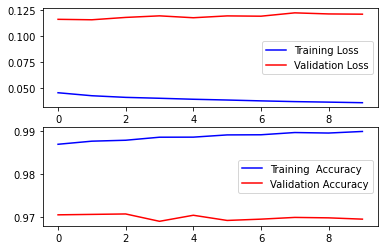

In [34]:
#Plotting the training and validation loss and accuracy
f,ax=plt.subplots(2,1) 

#Loss
ax[0].plot(h2.history['loss'],color='b',label='Training Loss')
ax[0].plot(h2.history['val_loss'],color='r',label='Validation Loss')
ax[0].legend(loc='center right');
#Accuracy
ax[1].plot(h2.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(h2.history['val_accuracy'],color='r',label='Validation Accuracy')
ax[1].legend(loc='center right');

In [12]:
model.compile(optimizer='rmsprop',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
h3 = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0535 - accuracy: 0.9830 - val_loss: 0.1467 - val_accuracy: 0.9627
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9832 - val_loss: 0.1417 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.1439 - val_accuracy: 0.9661
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9839 - val_loss: 0.1448 - val_accuracy: 0.9682
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9848 - val_loss: 0.1425 - val_accuracy: 0.9678
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9850 - val_loss: 0.1522 - val_accuracy: 0.9671
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0503 - accuracy: 0.9851 - val_loss: 0.1609 - val_accuracy:

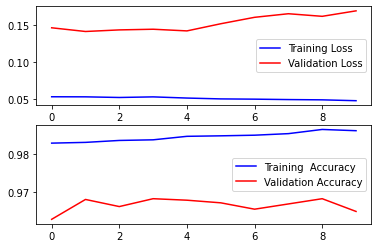

In [35]:
#Plotting the training and validation loss and accuracy
f,ax=plt.subplots(2,1) 

#Loss
ax[0].plot(h3.history['loss'],color='b',label='Training Loss')
ax[0].plot(h3.history['val_loss'],color='r',label='Validation Loss')
ax[0].legend(loc='center right');
#Accuracy
ax[1].plot(h3.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(h3.history['val_accuracy'],color='r',label='Validation Accuracy')
ax[1].legend(loc='center right');

In [14]:
model.compile(optimizer='nadam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
h4 = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0520 - accuracy: 0.9849 - val_loss: 0.1561 - val_accuracy: 0.9657
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.1703 - val_accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.1533 - val_accuracy: 0.9662
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.1546 - val_accuracy: 0.9678
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.1600 - val_accuracy: 0.9649
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.1572 - val_accuracy: 0.9679
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.1696 - val_accuracy:

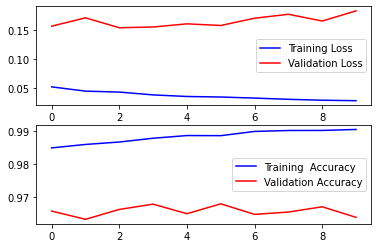

In [36]:
#Plotting the training and validation loss and accuracy
f,ax=plt.subplots(2,1) 

#Loss
ax[0].plot(h4.history['loss'],color='b',label='Training Loss')
ax[0].plot(h4.history['val_loss'],color='r',label='Validation Loss');
ax[0].legend(loc='center right');
#Accuracy
ax[1].plot(h4.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(h4.history['val_accuracy'],color='r',label='Validation Accuracy')
ax[1].legend(loc='center right');

In [16]:
score = model.evaluate(test_images,test_labels)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1822 - accuracy: 0.9638
Test score: 0.18224479258060455
Test accuracy: 0.9638000130653381


In [17]:
model_name = 'digits_recognition.h5'
model.save(model_name, save_format='h5')

In [18]:
loaded_model = tf.keras.models.load_model(model_name)
predictions_one_hot = loaded_model.predict([test_images])
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


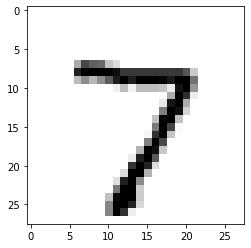

In [19]:
# Let's extract predictions with highest probabilities and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)
plt.imshow(test_images[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()